# Parallel Computation of $\pi$

This is a short exercise in performance modeling, based on what we saw in the introductory slides.

Due: **9:30 am (before class), Tuesday, August 27.**  Submit your answers to canvas.  You can submit them either as a pdf, or by inserting your answers as cells into this notebook and submitting the notebook.

When we want to compare two algorithms $f$ and $g$ that do the same thing, we look at their runtimes, which will be functions
with parameters, such as the problem size $N$ and the number of processes working together $P$.

Sometimes we will find that one algorithm dominates the other: that $T_f(N,P) < T_g(N,P)$ for all $N$ and all $P$.  
Most of the time, however, neither algorithm is dominant, and we start to ask questions, like "when (for what values of $N$ and $P$) is $T_f$ less than $T_g$?"  This exercise tries to familiarize you with that sort of thinking.

---

Suppose I care about computing $N$ digits of $\pi$, and I have two pseudocode algorithms available.

The first (roughly corresponding to [Borwein's quadratic algorithm](https://en.wikipedia.org/wiki/Borwein%27s_algorithm#Quadratic_convergence_(1984)) looks like the following:

In [1]:
from numpy import log2

def f(N):
    a, b, p = A()
    for i in range(int(log2(N))):
        a_new = B(a,b)
        b_new = C(a,b)
        p_new = D(a_new, b_new, p)
        a, b, p = (a_new, b_new, p_new)
    return p

Suppose that the only things that take time in this algorithm are the functions `A`, `B`, `C`, and `D`, and that $T_A = 11$, $T_B = 21$, $T_C = 13$ and $T_D = 13$.

**1 (1 pt).** What is $T_f(N, 1)$, the time it takes one process to run `f`?

1. $$T_f(N, 1)  = T_A+int(log2(N))*(T_B+T_C+T_D)$$ <br>
   $$T_f(N, 1) = 11+int(log2(N))*(21+13+13)$$ <br>
   $$T_f(N, 1) = 11+ 47*int(log2(N))$$
   

**2.** Suppose that multiple threads can divide up the operations in `f` and work in parallel without interfering with each other (but of course an operation can't begin until its inputs are available).

  **a (1 pt).** What is the degree of concurrency in `f` (how many processes can collaborate on `f` before there is no more work to do)?

   2.a: <br>
   degree of concurrency = $2$

  **b (1 pt)**. Using this model, what is the smallest value of $T_f(N,P)$ over all $P$?

2.b:  $$𝑇𝑓(𝑁,𝑃)min = T_A+int(log2(N))*(max(T_B,T_C)+T_D)$$ <br>
     $$𝑇𝑓(𝑁,𝑃)min = 11+ int(log2(N))*(21+13)$$ <br>
     $$𝑇𝑓(𝑁,𝑃)min= 11 + int(log2(N))*34$$

The next algorithm (roughly corresponding to [Gregory's series](https://en.wikipedia.org/wiki/Gregory%27s_series)) looks like this:

In [1]:
def g(N):
    p = 0.
    for i in range(N**2):
        p = p + E(i)
    return p

Suppose that the only thing that takes time in this algorithm are $E$ and addition, and that $T_E = 10$ and $T_+ = 1$.

**3 (1 pt).** What is $T_g(N,1)$, the time it takes one process to run `g`?

   3:  
   $$T_g(𝑁,1) = N^2*(T_+ + T_E)$$
   <br> Thus 
   $$T_g(𝑁,1) = 11N^2$$

**4.** With the same rules of parallelism as before,

  **a (1 pt).** What is the degree of concurrency in `g`? (Hint: assume addition is associative, that a sum like $a + b + c + d + ...$ can be done in any order)

   4.a:  $$N^2$$

  **b (1 pt).** Suppose that $P$ processes, working together, can sum a list of $P$ numbers together in $T_{sum}(P) = \log_2 P$ time.  Using this operation, what is a simple model for $T_g(N,P)$?

4.b:  
$$T_g(𝑁,P)= (N^2/P)*(T_+ + T_E) + log_2P$$
$$T_g(𝑁,P) = (N^2/P)*(11) + log_2P$$


  **c (1 pt).** Using this model, what is the smalles value of $T_g(N,P)$ over all $P$?

   4.c:

Calculate the derivative of equation :$$T_g(𝑁,P) = (N^2/P)*(11) + log_2P$$
solve $P$ for $$\frac{d T_g(N,P)}{d P} = 0$$
Thus
$$P =  11 N^2 ln2$$
When $P =  11 N^2 ln2$
$$T_g(𝑁,P) min = 1/ln2 + log_2(11N^2ln2)$$



**5 (1 pt).** Suppose we want to compute 16 digits of $\pi$: using your models from (1) and (4) how many processes $P$ do we need before $T_g(16,P) < T_f(16,1)$?

5: Needed **15** processes, As shown in below:

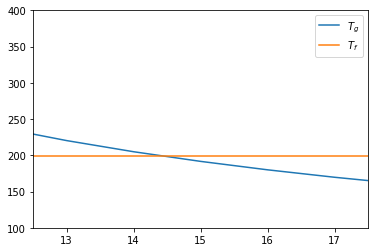

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log2
P = np.array(range(1,20))
Tg = []
Tf = []
for p in P:
    Tg_p = 16**2*(10+1)/p+log2(p)
    Tf_1 = 11+int(log2(16))*(21+13+13)
    Tg.append(Tg_p)
    Tf.append(Tf_1)
plt.figure()
plt.plot(P,Tg,label = '$T_g$')
plt.plot(P,Tf,label = '$T_f$')
plt.xlim(12.5,17.5)
plt.ylim(100,400)
plt.legend()


**(Bonus 1 pt)**. Generalize (5) and define a function $P(N)$ that estimates how many processes $P$ are needed before
$T_g(N,P(N)) < T_f(N,1)$.

$$T_g(N,P(N)) = (N^2/P)*(11) + log_2P$$ <br>
$$T_f(N,1)  = 11+ 47*int(log_2(N))$$ <br>
Thus: $$(N^2/P)*(11) + log_2P < 11+ 47*int(log_2(N))$$ <br>
$P(N)$ shall be the solution to the equation above, in terms of $N$.



